In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Collection
#### Load a CSV file with historical stock price data


In [21]:
data = pd.read_csv('Dataset\stock_data.csv')

In [22]:
data.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
131,2022-11-23,152.080002,153.369995,151.880005,152.419998,150.655441,5640200


## Data Preprocessing
#### The CSV file has 'Date' and 'Close' columns

In [23]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

## Exploratory Data Analysis (EDA)

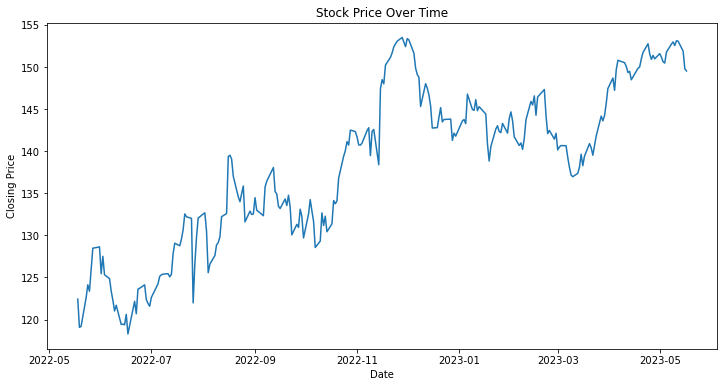

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

## Feature Engineering

In [27]:
# Calculate the 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()


## Predictive Modeling

In [28]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [29]:
# Prepare the input features and target variable
X_train = np.array(range(len(train_data))).reshape(-1, 1)
y_train = train_data['Close'].values

In [30]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [31]:
# Prepare the test data for evaluation
X_test = np.array(range(len(train_data), len(data))).reshape(-1, 1)
y_test = test_data['Close'].values

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 44.87494429171676


## Visualization and Reporting

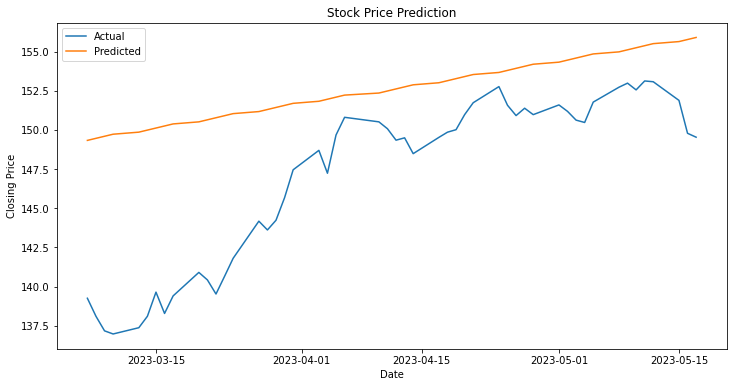

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], y_pred, label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()